STEP 1 - IMPORTING LIBRARIES


In this step, we import all the required Python libraries for data processing, visualization, NLP operations, and machine learning. These include pandas, NumPy, NLTK, scikit-learn, and matplotlib.

In [1]:
# Import Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download NLTK Resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /home/urmum/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/urmum/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/urmum/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

STEP 2 - LOADING DATASET

Here, we load the dataset containing product reviews and their sentiment labels (positive/negative/neutral). The dataset is read using pandas for easy manipulation.

In [2]:
# Load dataset
data = pd.read_csv("Dataset-SA.csv")
data.head()


,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


STEP-3 DATA EXPLORATION

In this step, we explore the dataset to understand its structure, check for missing values, and analyze the distribution of sentiments.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB
None
product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64


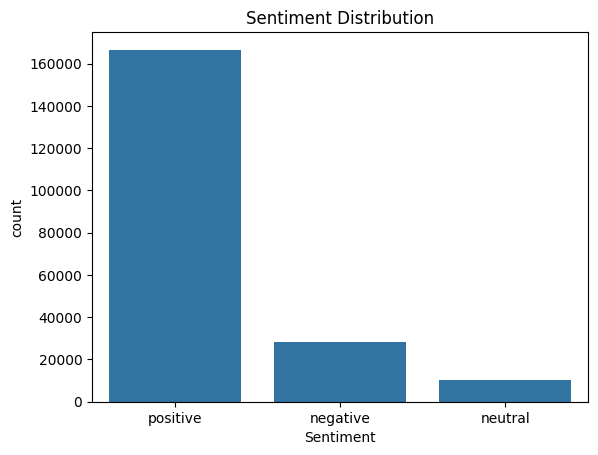

In [3]:
print(data.info())

print(data.isnull().sum())

# Sentiment distribution
sns.countplot(x='Sentiment', data=data)
plt.title("Sentiment Distribution")
plt.show()


STEP-4 DATA CLEANING AND PREPROCESSING

Text data often contains unwanted characters, punctuation, and stopwords. We perform tokenization, stopword removal, stemming, and lemmatization to clean the text.

In [4]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

data = data.dropna(subset=['Review']).reset_index(drop=True) ## remove missing reviews

def preprocess_text(text):
    text = str(text)
    text = text.lower()

    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

data['clean_text'] = data['Review'].apply(preprocess_text)
data.head()


,product_name,product_price,Rate,Review,Summary,Sentiment,clean_text
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,super
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,awesom
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,fair
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,useless product
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,fair


STEP-5 TEXT VECTORIZATION (TF-IDF)

Since ML models cannot understand text directly, we convert the cleaned text into numerical form using TF-IDF (Term Frequency–Inverse Document Frequency).

In [5]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['clean_text']).toarray()

# Target variable
y = data['Sentiment']

STEP-6 TEST - TRAIN SPLIT

The dataset is split into training and testing sets so that the model can learn from one part and be evaluated on unseen data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

STEP-7 MODEL BUILDING (NAIVE BAYES)

We use the Naive Bayes classifier, which performs well for text classification tasks due to its simplicity and efficiency

In [7]:
# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

STEP-8 MODEL EVALUATION

After training, we evaluate the model using accuracy, confusion matrix, and classification report to check how well it predicts sentiments.

Accuracy: 0.9041521148622429


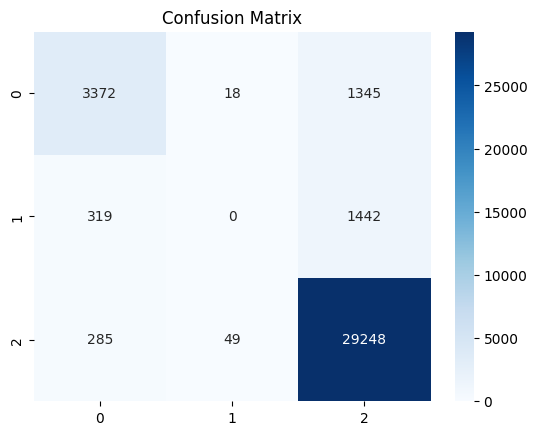

              precision    recall  f1-score   support

    negative       0.85      0.71      0.77      4735
     neutral       0.00      0.00      0.00      1761
    positive       0.91      0.99      0.95     29582

    accuracy                           0.90     36078
   macro avg       0.59      0.57      0.57     36078
weighted avg       0.86      0.90      0.88     36078



In [8]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


STEP-9 TESTING ON NEW DATA

Finally, we test the model on new/unseen reviews to see its real-world performance.

In [9]:
# Test
sample = ["The product quality is amazing!", "Very bad experience, not recommended."]
sample_clean = [preprocess_text(text) for text in sample]
sample_vec = vectorizer.transform(sample_clean)
print(model.predict(sample_vec))


['positive' 'negative']


CONCLUSION

We successfully built a sentiment analysis model using NLP and ML techniques. The model preprocesses text, converts it into numerical features using TF-IDF, and classifies sentiments using Naive Bayes with good accuracy.